# Model will be trained with BinaryLike ObservedOnly Data

BinaryLike ObservedOnly dataset contains labeled rows [0, 1] - ['Not Liked', 'Liked'] pairs 

Since BinaryLike ObservedOnly dataset provides a valid criterion for like

It is a useful dataset for the recommendation system

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import warnings

In [2]:
#Printing library versions
print('numpy Version: ' + np.__version__)
print('pandas Version: ' + pd.__version__)
print('tensorflow Version: ' + tf.__version__)

numpy Version: 1.16.5
pandas Version: 0.25.1
tensorflow Version: 2.0.0


In [3]:
#GPU will be used for training
myGPU = tf.test.gpu_device_name()
if myGPU:
    print(myGPU)
else:
    print("Error")

/device:GPU:0


In [4]:
#Reading Qualified BinaryLike ObservedOnly training data from pkl file
trainingDf = pd.read_pickle("../Data/pkl/1M/Qualified/BinaryLike/ObservedOnly/Training.pkl")
trainingDf

,UserId,MovieId,Like
0,30,882,1
1,2836,119,1
2,6380,1230,0
3,9569,1646,1
4,5301,797,1
...,...,...,...
753549,9027,1666,0
753550,1694,88,1
753551,8853,42,1
753552,1756,2598,1


In [5]:
#creating a user array for training input 
trainingUser = trainingDf[['UserId']].values.astype(np.int32)
trainingUser = trainingUser.reshape((trainingUser.shape[0]))
trainingUser

array([  30, 2836, 6380, ..., 8853, 1756, 9135])

In [6]:
#creating a movie array for training input 
trainingMovie = trainingDf[['MovieId']].values.astype(np.int32)
trainingMovie = trainingMovie.reshape((trainingMovie.shape[0]))
trainingMovie

array([ 882,  119, 1230, ...,   42, 2598, 1834])

In [7]:
#creating an array for training input 
trainingX = [trainingUser, trainingMovie]
trainingX

[array([  30, 2836, 6380, ..., 8853, 1756, 9135]),
 array([ 882,  119, 1230, ...,   42, 2598, 1834])]

In [8]:
#creating an array for training output 
trainingY = trainingDf[['Like']].values.astype(np.int8)
trainingY = trainingY.reshape((trainingY.shape[0]))
trainingY

array([1, 1, 0, ..., 1, 1, 1], dtype=int8)

In [9]:
#Clearing Memory
del trainingDf

In [10]:
#Reading Qualified BinaryLike ObservedOnly validation data from pkl file
validationDf = pd.read_pickle("../Data/pkl/1M/Qualified/BinaryLike/ObservedOnly/Validation.pkl")
validationDf

,UserId,MovieId,Like
0,2570,197,1
1,9495,2601,1
2,4747,658,1
3,8572,202,0
4,5334,1178,1
...,...,...,...
123664,9721,1914,1
123665,4293,1472,1
123666,7198,277,1
123667,2699,6436,1


In [11]:
#creating a user array for validation input 
validationUser = validationDf[['UserId']].values.astype(np.int32)
validationUser = validationUser.reshape((validationUser.shape[0]))
validationUser

array([2570, 9495, 4747, ..., 7198, 2699,  751])

In [12]:
#creating a movie array for validation input 
validationMovie = validationDf[['MovieId']].values.astype(np.int32)
validationMovie = validationMovie.reshape((validationMovie.shape[0]))
validationMovie

array([ 197, 2601,  658, ...,  277, 6436,  285])

In [13]:
#creating an array for validation input 
validationX = [validationUser, validationMovie]
validationX

[array([2570, 9495, 4747, ..., 7198, 2699,  751]),
 array([ 197, 2601,  658, ...,  277, 6436,  285])]

In [14]:
#creating an array for validation output 
validationY = validationDf[['Like']].values.astype(np.int8)
validationY = validationY.reshape((validationY.shape[0]))
validationY

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

In [15]:
#Clearing Memory
del validationDf

In [16]:
#Setting model variables
userSize = 10073
movieSize = 22033
latentDimensionMF = 4
latentDimensionMLP = 32
regMF = 0
regMLP = 0.01
regDense = 0.01
denseActivation = 'relu'

In [17]:
#Creating Neural Collaborative Filtering(NCF) model

#This Neural matrix factorization model based on https://arxiv.org/pdf/1708.05031.pdf
#As a result of the researches, it was determined as the most useful architecture
#This architecture will be trained with different data types and explanations will be made on the results. 


# input layer
userInput = tf.keras.layers.Input(shape = (), dtype = "int32", name = "userId")
movieInput = tf.keras.layers.Input(shape = (), dtype = "int32", name = "movieId")

# embedding layers
userEmbeddingMF = tf.keras.layers.Embedding(
    input_dim = userSize,
    output_dim = latentDimensionMF,
    name = 'userEmbeddingMF',
    embeddings_initializer = 'he_normal',
    embeddings_regularizer = tf.keras.regularizers.l2(regMF),
    input_length = 1,
)
movieEmbeddingMF = tf.keras.layers.Embedding(
    input_dim = movieSize,
    output_dim = latentDimensionMF,
    name = "movieEmbeddingMF",
    embeddings_initializer = "he_normal",
    embeddings_regularizer = tf.keras.regularizers.l2(regMF),
    input_length = 1,
)

userEmbeddingMLP = tf.keras.layers.Embedding(
    input_dim = userSize,
    output_dim = latentDimensionMLP,
    name = "userEmbeddingMLP",
    embeddings_initializer = "he_normal",
    embeddings_regularizer = tf.keras.regularizers.l2(regMLP),
    input_length = 1,
)
movieEmbeddingMLP = tf.keras.layers.Embedding(
    input_dim = movieSize,
    output_dim = latentDimensionMLP,
    name="movieEmbeddingMLP",
    embeddings_initializer = "he_normal",
    embeddings_regularizer = tf.keras.regularizers.l2(regMLP),
    input_length = 1,
)

# MF vector
userLatentMF = tf.keras.layers.Flatten()(userEmbeddingMF(userInput))
movieLatentMF = tf.keras.layers.Flatten()(movieEmbeddingMF(movieInput))
catLatentMF = tf.keras.layers.Multiply()([userLatentMF, movieLatentMF])

# MLP vector
userLatentMLP = tf.keras.layers.Flatten()(userEmbeddingMLP(userInput))
movieLatentMLP = tf.keras.layers.Flatten()(movieEmbeddingMLP(movieInput))
catLatentMLP = tf.keras.layers.Concatenate()([userLatentMLP, movieLatentMLP])

vectorMLP = catLatentMLP

layer = tf.keras.layers.Dense(
    32,
    activity_regularizer = tf.keras.regularizers.l2(regDense),
    activation = denseActivation,
    name = 'Dense1'
)

vectorMLP = layer(vectorMLP)

layer = tf.keras.layers.Dense(
    16,
    activity_regularizer = tf.keras.regularizers.l2(regDense),
    activation = denseActivation,
    name = 'Dense2'
)

vectorMLP = layer(vectorMLP)

predictLayer = tf.keras.layers.Concatenate()([catLatentMF, vectorMLP])

result = tf.keras.layers.Dense(1, activation="sigmoid", kernel_initializer="lecun_uniform", name="Like")

output = result(predictLayer)

model = tf.keras.models.Model(inputs = [userInput, movieInput], outputs = [output])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
userId (InputLayer)             [(None,)]            0                                            
__________________________________________________________________________________________________
movieId (InputLayer)            [(None,)]            0                                            
__________________________________________________________________________________________________
userEmbeddingMLP (Embedding)    (None, 32)           322336      userId[0][0]                     
__________________________________________________________________________________________________
movieEmbeddingMLP (Embedding)   (None, 32)           705056      movieId[0][0]                    
______________________________________________________________________________________________

In [18]:
#Compile model
#Since the dataset has 2 label [0, 1] - ['Not Liked', 'Liked'] binary crossentropy function will be used as loss function
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss="binary_crossentropy",
    metrics=[
        tf.keras.metrics.TruePositives(name="tp"),
        tf.keras.metrics.FalsePositives(name="fp"),
        tf.keras.metrics.TrueNegatives(name="tn"),
        tf.keras.metrics.FalseNegatives(name="fn"),
        tf.keras.metrics.BinaryAccuracy(name="accuracy")
    ])

In [19]:
#Defining CallBack class for save model
class ModelSaver(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        #calculation based on epoch + 1 Due to first epoch starts at 0
        if (epoch + 1) % 3 == 0:
            self.model.save("../Model/ObservedOnlyModel/Model{}.h5".format(epoch + 1))

In [20]:
#ignore warnings due to Converting sparse IndexedSlices to a dense Tensor of unknown shape warning
warnings.filterwarnings('ignore')

#Fit the model
#This dataset categorized as liked movies and not liked movies
#Our dataset contains only interacted pairs
#Since BinaryLike ObservedOnly dataset provides a valid criterion for like It is a useful dataset for the recommendation system
with tf.device('/GPU:0'):
    trainingHistory = model.fit(
        x = trainingX,
        y = trainingY,
        batch_size = 64,
        shuffle = True,
        callbacks=[ModelSaver()],
        epochs = 12,
        verbose = 1,
        validation_data = (validationX, validationY),
    )

Train on 753554 samples, validate on 123669 samples
Epoch 1/12
753554/753554 [==============================] - 253s 335us/sample - loss: 0.4684 - tp: 607295.0000 - fp: 118492.0000 - tn: 18306.0000 - fn: 9461.0000 - accuracy: 0.8302 - val_loss: 0.4112 - val_tp: 99220.0000 - val_fp: 17501.0000 - val_tn: 4664.0000 - val_fn: 2284.0000 - val_accuracy: 0.8400
Epoch 2/12
753554/753554 [==============================] - 249s 330us/sample - loss: 0.3803 - tp: 598814.0000 - fp: 96542.0000 - tn: 40256.0000 - fn: 17942.0000 - accuracy: 0.8481 - val_loss: 0.3886 - val_tp: 98441.0000 - val_fp: 15946.0000 - val_tn: 6219.0000 - val_fn: 3063.0000 - val_accuracy: 0.8463
Epoch 3/12
753554/753554 [==============================] - 251s 333us/sample - loss: 0.3524 - tp: 594903.0000 - fp: 84967.0000 - tn: 51831.0000 - fn: 21853.0000 - accuracy: 0.8582 - val_loss: 0.3778 - val_tp: 96976.0000 - val_fp: 14593.0000 - val_tn: 7572.0000 - val_fn: 4528.0000 - val_accuracy: 0.8454
Epoch 4/12
753554/753554 [=======

In [21]:
#Checking Training history data
trainingHistory.history

{'loss': [0.4684484259639998,
  0.3803263645405718,
  0.35239988988413806,
  0.3378388353650934,
  0.3289528313956176,
  0.32340299262992817,
  0.31752537222857896,
  0.3111493999263266,
  0.30874846024604297,
  0.30818588194131125,
  0.30625805159546154,
  0.3044532614615324],
 'tp': [607295.0,
  598814.0,
  594903.0,
  593724.0,
  593336.0,
  593308.0,
  593388.0,
  593441.0,
  593700.0,
  593573.0,
  593720.0,
  593671.0],
 'fp': [118492.0,
  96542.0,
  84967.0,
  79861.0,
  77510.0,
  76108.0,
  75224.0,
  74599.0,
  74013.0,
  73532.0,
  73206.0,
  72976.0],
 'tn': [18306.0,
  40256.0,
  51831.0,
  56937.0,
  59288.0,
  60690.0,
  61574.0,
  62199.0,
  62785.0,
  63266.0,
  63592.0,
  63822.0],
 'fn': [9461.0,
  17942.0,
  21853.0,
  23032.0,
  23420.0,
  23448.0,
  23368.0,
  23315.0,
  23056.0,
  23183.0,
  23036.0,
  23085.0],
 'accuracy': [0.8302006,
  0.8480746,
  0.8582451,
  0.86345637,
  0.86606133,
  0.8678847,
  0.869164,
  0.8700637,
  0.87118506,
  0.87165487,
  0.8722

In [22]:
#Import pyplot for graphics
from matplotlib import pyplot as plt

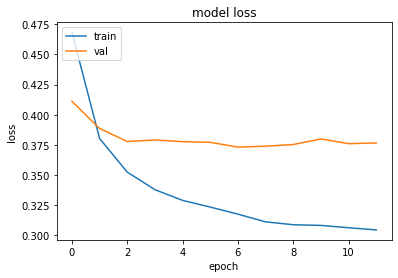

In [23]:
#Loss Graph
plt.plot(trainingHistory.history['loss'])
plt.plot(trainingHistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ticklabel_format(useOffset=False)
plt.show()

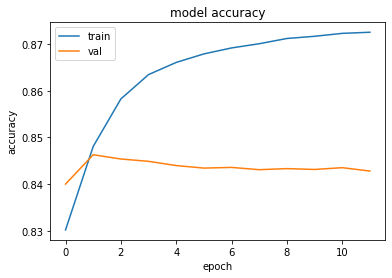

In [24]:
#Accuracy Graph
plt.plot(trainingHistory.history['accuracy'])
plt.plot(trainingHistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ticklabel_format(useOffset=False)
plt.show()

In [25]:
#Reading Qualified BinaryLike ObservedOnly test data from pkl file
testDf = pd.read_pickle("../Data/pkl/1M/Qualified/BinaryLike/ObservedOnly/Test.pkl")
testDf

,UserId,MovieId,Like
0,8193,163,0
1,2328,2593,1
2,457,1796,0
3,6870,1818,1
4,600,149,1
...,...,...,...
123665,1062,105,1
123666,3176,2296,1
123667,7009,376,1
123668,4864,4898,1


In [26]:
#creating a user array for test input 
testUser = testDf[['UserId']].values.astype(np.int32)
testUser = testUser.reshape((testUser.shape[0]))
testUser

array([8193, 2328,  457, ..., 7009, 4864,  814])

In [27]:
#creating a movie array for test input 
testMovie = testDf[['MovieId']].values.astype(np.int32)
testMovie = testMovie.reshape((testMovie.shape[0]))
testMovie

array([ 163, 2593, 1796, ...,  376, 4898,  731])

In [28]:
#creating an array for test input 
testX = [testUser, testMovie]
testX

[array([8193, 2328,  457, ..., 7009, 4864,  814]),
 array([ 163, 2593, 1796, ...,  376, 4898,  731])]

In [29]:
#creating an array for test output 
testY = testDf[['Like']].values.astype(np.int8)
testY = testY.reshape((testY.shape[0]))
testY

array([0, 1, 0, ..., 1, 1, 1], dtype=int8)

In [30]:
#Clearing Memory
del testDf

In [31]:
#Model evaluating with test values
testResult = model.evaluate(x = testX, y = testY, batch_size = 64, verbose = 0)

In [32]:
#Print testResult
testResult

[0.3754480775688791, 95967.0, 13898.0, 8309.0, 5496.0, 0.8431794]

In [33]:
#Print Test Loss
print('Test Loss: ' + str(testResult[0]))

Test Loss: 0.3754480775688791


In [34]:
#Print Test Accuracy
print('Test Accuracy: ' + str(testResult[5]))

Test Accuracy: 0.8431794


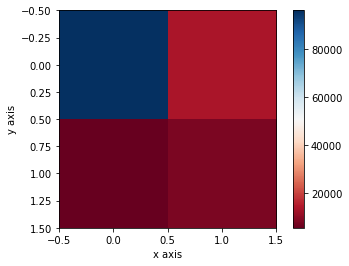

In [35]:
#Confusion Matrix
#[tp][fp]
#[fn][tn]
cm = [[testResult[1], testResult[2]],
      [testResult[4], testResult[3]]]

plt.xlabel('x axis')
plt.ylabel('y axis')

im = plt.imshow(cm,cmap=plt.cm.RdBu)

plt.colorbar(im)
plt.show()

In [36]:
#When the metric graphs are examined, it is seen that the best model is reached between the 8th and 12th epochs.
#After the 9th epoch, the amount of performance does not seem to change much.
#So the model in the 9th epoch is determined as the best model.

#Model9 Loading from h5 file
model = tf.keras.models.load_model("../Model/ObservedOnlyModel/Model9.h5")

In [37]:
#Best Model evaluating with test values
testResult = model.evaluate(x = testX, y = testY, batch_size = 64, verbose = 0)

In [38]:
#Print testResult for Best Model
testResult

[0.3741056228624817, 96340.0, 14155.0, 8052.0, 5123.0, 0.8441174]

In [39]:
#Print Test Loss for Best Model
print('Test Loss: ' + str(testResult[0]))

Test Loss: 0.3741056228624817


In [40]:
#Print Test Accuracy for Best Model
print('Test Accuracy: ' + str(testResult[5]))

Test Accuracy: 0.8441174


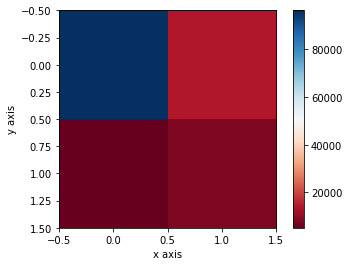

In [41]:
#Confusion Matrix for Best Model
#[tp][fp]
#[fn][tn]
cm = [[testResult[1], testResult[2]],
      [testResult[4], testResult[3]]]

plt.xlabel('x axis')
plt.ylabel('y axis')

im = plt.imshow(cm,cmap=plt.cm.RdBu)

plt.colorbar(im)
plt.show()

# Analysing Result

As can be seen above, the performance of the model obtained at the end of the training and the 9th model that chosen as the best model on the test data is almost equal

In this case, it is pointless to train the model further after the 9th epoch

Result look good

Dataset is usefull for recommendation system

Despite this, confusion matrix shows that there is difference between positive and negative sample sizes

Producing a positive result reduces the value of the model's loss function

Therefore, the model tends to produce positive results

As seen in the confusion matrix [tp] > [fp] > [tn] > [fn] this means model tends to produce positive result

But still this trained model is valuable